# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

We want to predict jobs salaries based on jobs informations. Our goal is to improve the salary predictor KPI

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
import math
from sklearn.model_selection import train_test_split
%matplotlib inline
#your info here
__author__ = "Alex EBE"
__email__ = "alexauguste01@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
#test_features = pd.read_csv('data/test_features.csv')
features = pd.read_csv('data/train_features.csv')
salaries = pd.read_csv('data/train_salaries.csv')

In [3]:
features.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
features.shape

(1000000, 8)

In [5]:
salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [6]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


The dataset has only 2 numerical variables: `yearsExperience` and `milesFromMetropolis`

### ---- 3 Clean the data ----

In [9]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
duplicate = features.duplicated(subset=['jobId'])
duplicated = duplicate[duplicate == True]
duplicated

Series([], dtype: bool)

There is no duplicate rows

In [10]:
#Invalid data
invalid_salaries = salaries.loc[salaries['salary']<=0,:]
invalid_job_offers = features.loc[invalid_salaries.index,:]
invalid_salaries #invalid data in outcome dataset

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


In [11]:
invalid_job_offers #invalid data in feature dataset

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29


Jod Ids `JOB1362684438246`, `JOB1362684903671`, `JOB1362685059763`, `JOB1362685223816`, `JOB1362685235843` are invalid.
Let's remove them

In [12]:
#Remove invalid data
salaries.drop(invalid_salaries.index, inplace=True)
features.drop(invalid_salaries.index, inplace=True)

In [13]:
salaries.shape

(999995, 2)

In [14]:
#Reset indexing
salaries.reset_index(inplace=True)
features.reset_index(inplace=True)

Split data between train and test

In [15]:
features_train, features_test, salaries_train, salaries_test = train_test_split(features, salaries, test_size=0.2, random_state=50)

In [16]:
features_train.describe()

,index,yearsExperience,milesFromMetropolis
count,799996.000000,799996.000000,799996.000000
mean,499858.128088,11.994076,49.524638
std,288683.430795,7.211381,28.873037
min,1.000000,0.000000,0.000000
25%,249750.750000,6.000000,25.000000
50%,499845.500000,12.000000,50.000000
75%,749980.250000,18.000000,75.000000
max,999999.000000,24.000000,99.000000


In [17]:
features_test.describe()

,index,yearsExperience,milesFromMetropolis
count,199999.000000,199999.000000,199999.000000
mean,500563.373107,11.985730,49.548353
std,288642.402976,7.216439,28.896515
min,0.000000,0.000000,0.000000
25%,251012.500000,6.000000,25.000000
50%,500597.000000,12.000000,50.000000
75%,750076.000000,18.000000,75.000000
max,999993.000000,24.000000,99.000000


### ---- 4 Explore the data (EDA) ----

In [35]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

Summarize the **major** variable

<AxesSubplot:xlabel='major', ylabel='count'>

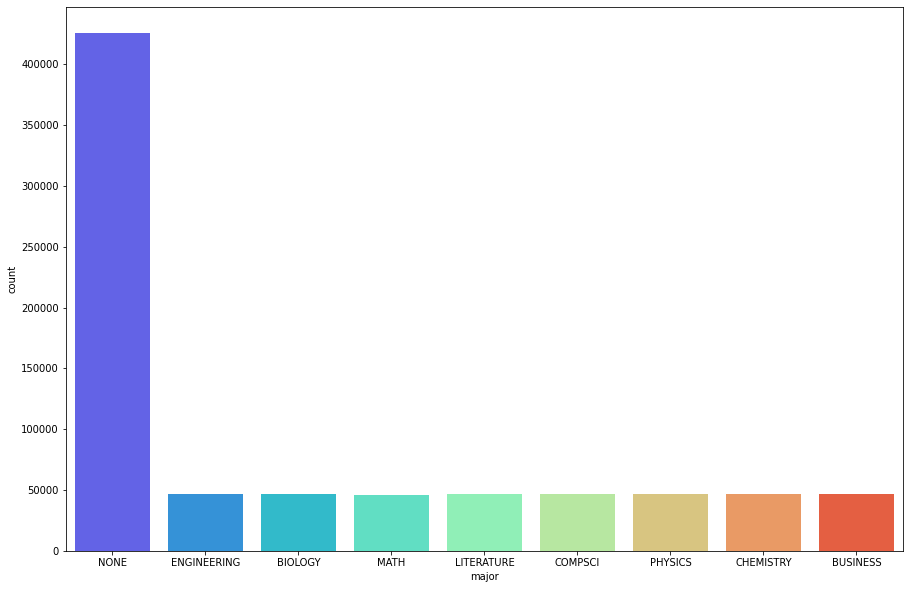

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='major', data=features_train, palette='rainbow')

Summarize the **jobType** variable

<AxesSubplot:xlabel='jobType', ylabel='count'>

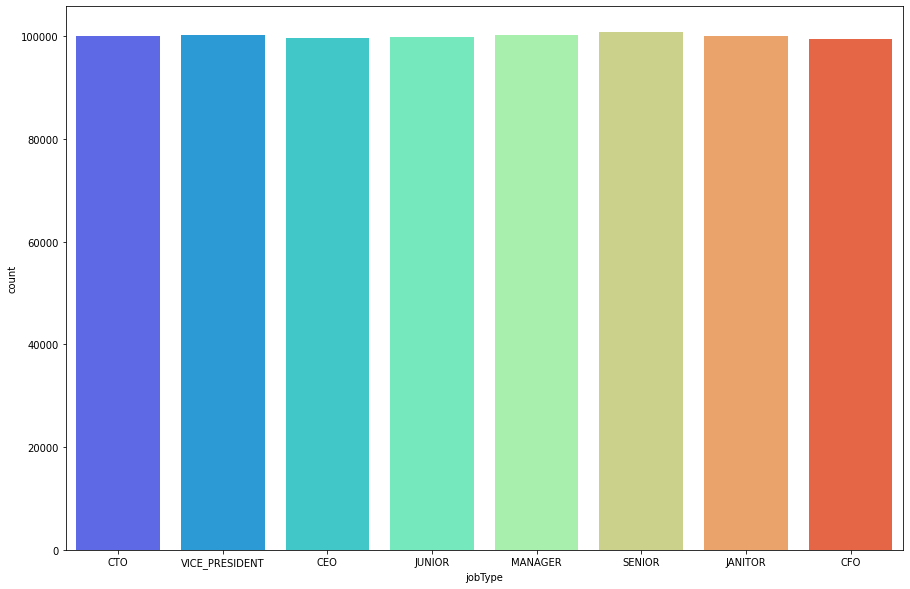

In [79]:
plt.figure(figsize=(15,10))
sns.countplot(x='jobType', data=features_train, palette='rainbow')

Summarize the **degree** variable

<AxesSubplot:xlabel='degree', ylabel='count'>

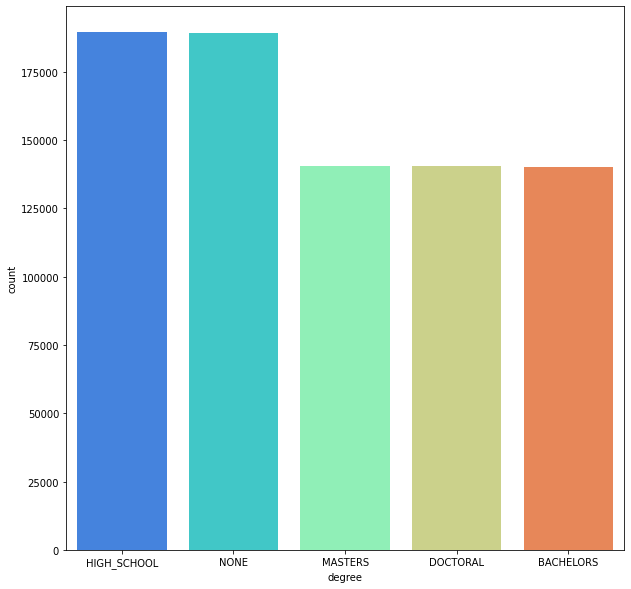

In [80]:
plt.figure(figsize=(10,10))
sns.countplot(x='degree', data=features_train, palette='rainbow')

Summarize the **industry** variable

<AxesSubplot:xlabel='industry', ylabel='count'>

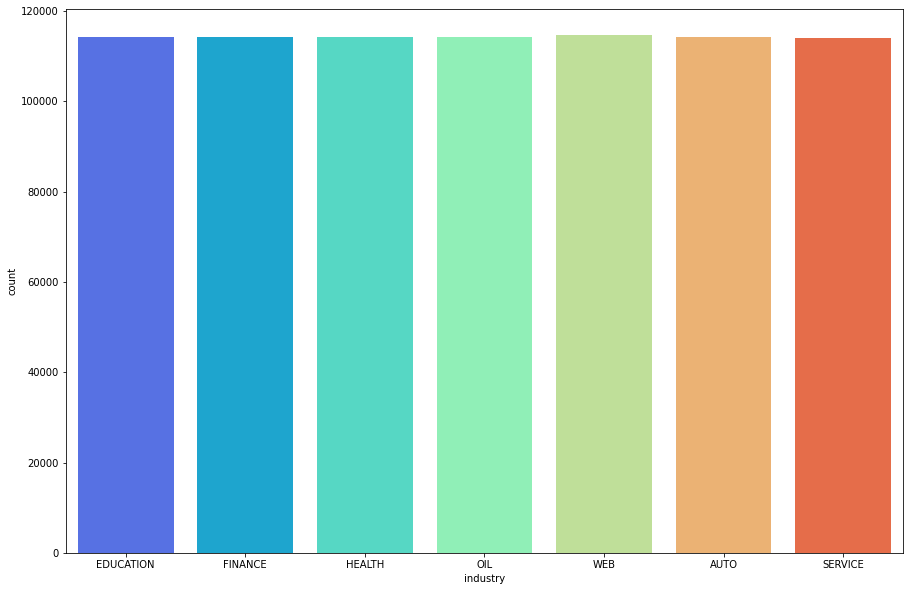

In [81]:
plt.figure(figsize=(15,10))
sns.countplot(x='industry', data=features_train, palette='rainbow')

c:\users\alexa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearsExperience'>

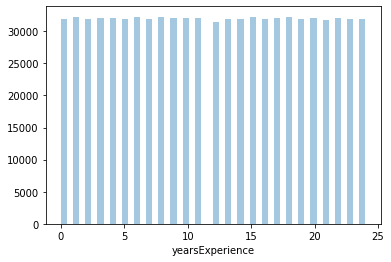

In [82]:
sns.distplot(features_train['yearsExperience'],kde=False, bins=50)

Summarize **salary** variable

In [18]:
job_offers = pd.concat([features_train, salaries_train['salary']], axis=1)

In [19]:
job_offers.head()

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
731320,731323,JOB1362685139010,COMP26,CTO,HIGH_SCHOOL,NONE,EDUCATION,7,80,66
614663,614665,JOB1362685022352,COMP7,VICE_PRESIDENT,NONE,NONE,FINANCE,21,41,151
695414,695417,JOB1362685103104,COMP52,VICE_PRESIDENT,NONE,NONE,HEALTH,17,85,84
888566,888571,JOB1362685296258,COMP61,CTO,MASTERS,ENGINEERING,OIL,2,41,151
133503,133504,JOB1362684541191,COMP53,VICE_PRESIDENT,DOCTORAL,BIOLOGY,WEB,18,59,153


<AxesSubplot:xlabel='major', ylabel='salary'>

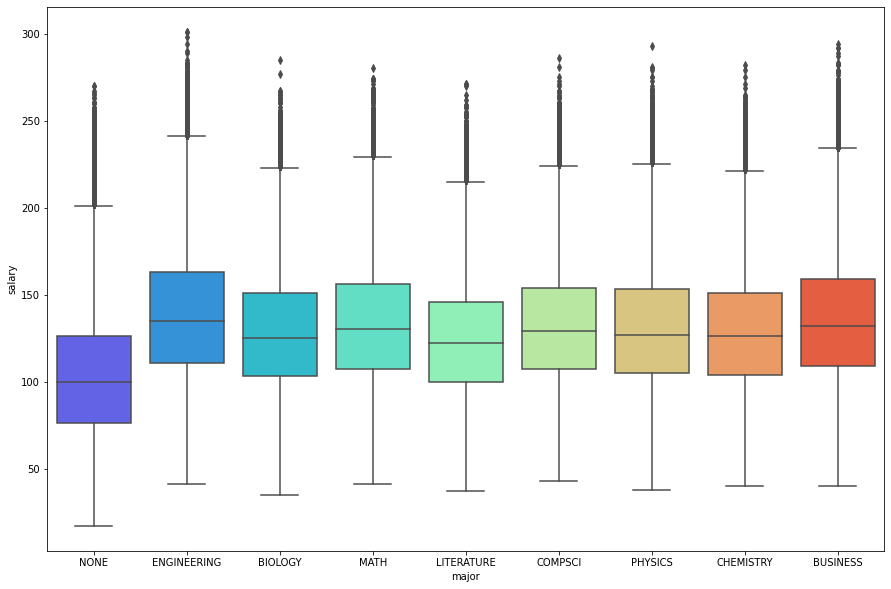

In [85]:
plt.figure(figsize=(15,10))
sns.boxplot(x="major", y="salary", data=job_offers,palette='rainbow')

<AxesSubplot:xlabel='jobType', ylabel='salary'>

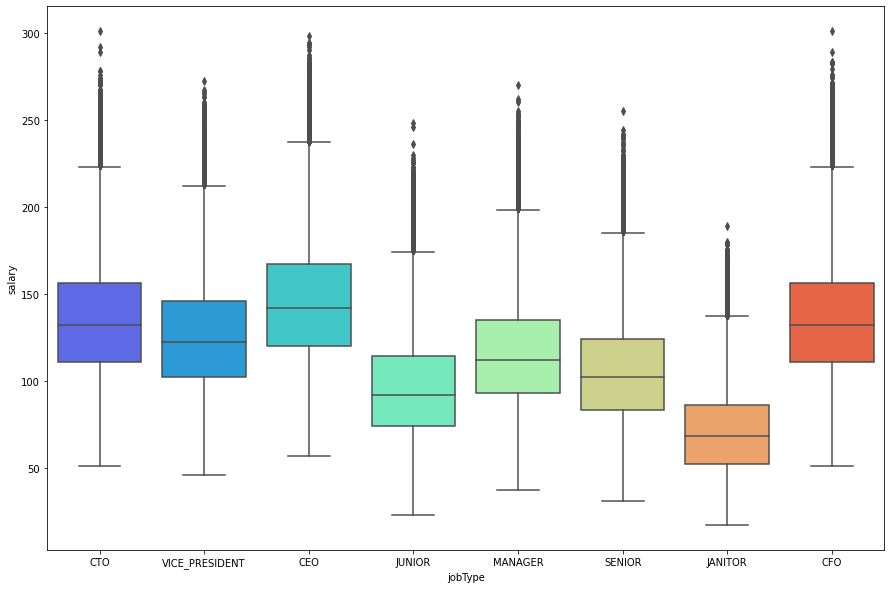

In [86]:
plt.figure(figsize=(15,10))
sns.boxplot(x="jobType", y="salary", data=job_offers,palette='rainbow')

In [87]:
job_offers['jobType'].unique()

array(['CTO', 'VICE_PRESIDENT', 'CEO', 'JUNIOR', 'MANAGER', 'SENIOR',
       'JANITOR', 'CFO'], dtype=object)

<AxesSubplot:xlabel='jobType', ylabel='salary'>

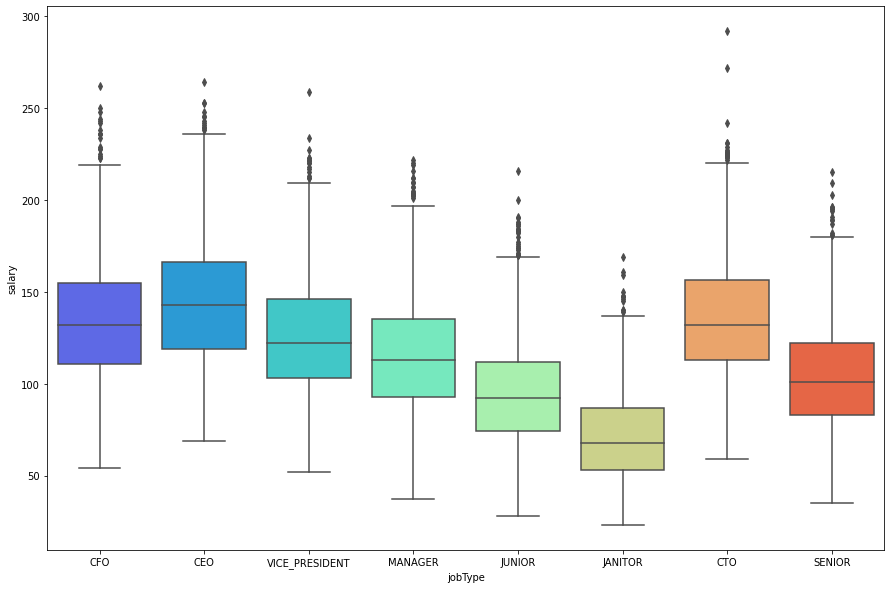

In [88]:
plt.figure(figsize=(15,10))
comp1 = job_offers[job_offers['companyId']=='COMP1']
sns.boxplot(x="jobType", y="salary", order=['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR','CTO', 'SENIOR'], data=comp1,palette='rainbow')

<AxesSubplot:xlabel='degree', ylabel='salary'>

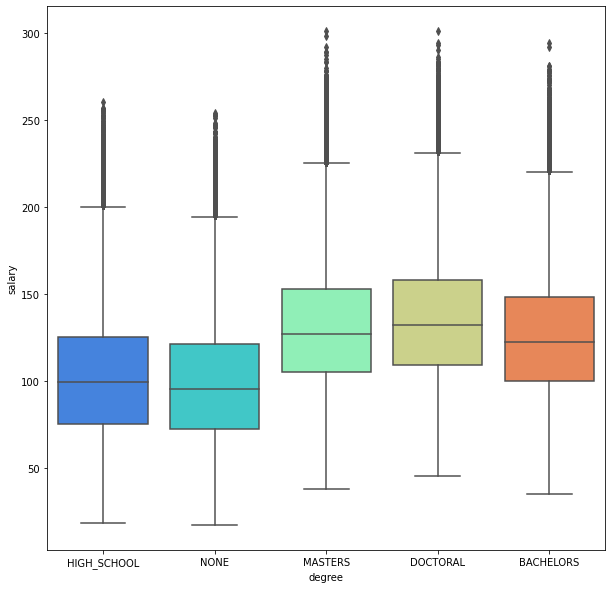

In [90]:
plt.figure(figsize=(10,10))
sns.boxplot(x="degree", y="salary", data=job_offers,palette='rainbow')

c:\users\alexa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

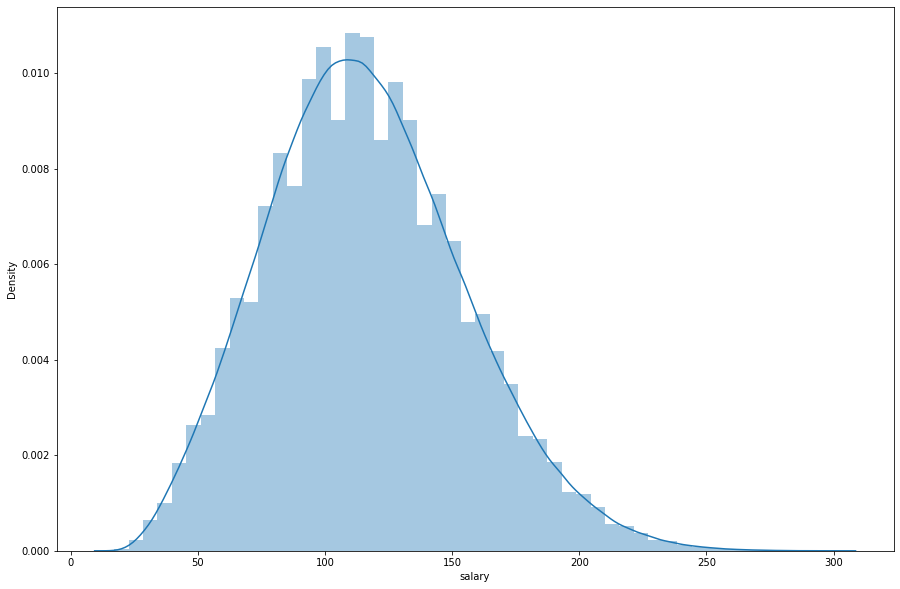

In [91]:
plt.figure(figsize=(15,10))
sns.distplot(job_offers['salary'], bins=50)

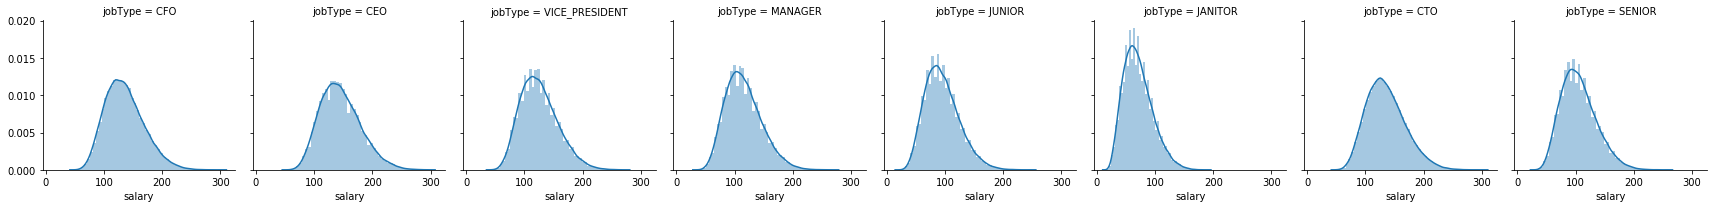

In [ ]:
g = sns.FacetGrid(job_offers, col="jobType")
# Notice hwo the arguments come after plt.scatter call
g = g.map(sns.distplot, "salary").add_legend()

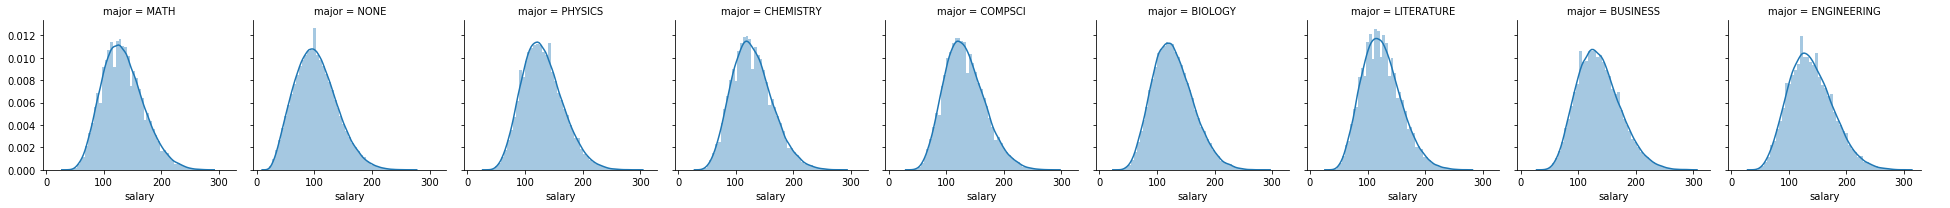

In [ ]:
g = sns.FacetGrid(job_offers, col="major")
# Notice hwo the arguments come after plt.scatter call
g = g.map(sns.distplot, "salary").add_legend()

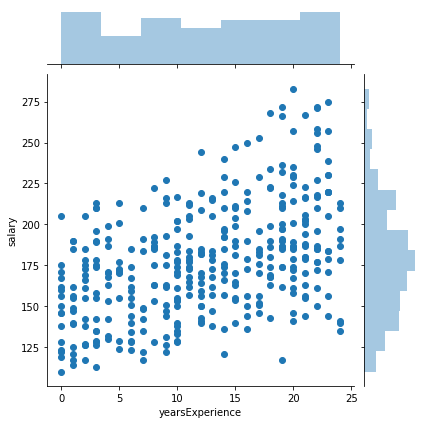

In [ ]:
sd1 = job_offers.loc[(job_offers['jobType']=='CEO') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='ENGINEERING') & (job_offers['industry']=='FINANCE'),:]
sns.jointplot(x='yearsExperience',y='salary',data=sd1,kind='scatter')

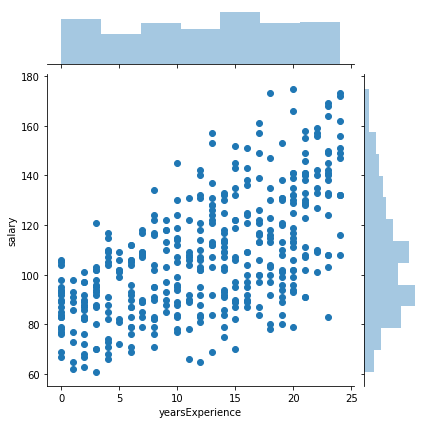

In [ ]:
sd2 = job_offers.loc[(job_offers['jobType']=='SENIOR') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='PHYSICS') & (job_offers['industry']=='AUTO'),:]
sns.jointplot(x='yearsExperience',y='salary',data=sd2,kind='scatter')
#sns.lmplot(x='yearsExperience',y='salary',data=sd2,hue='sex',palette='coolwarm')

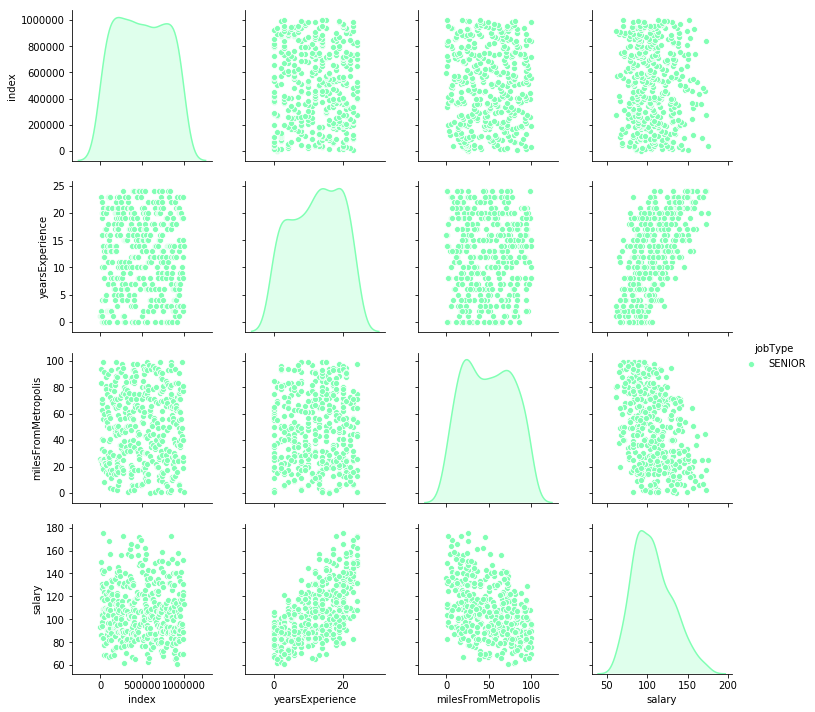

In [ ]:
sd3 = job_offers.loc[(job_offers['jobType']=='SENIOR') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='PHYSICS') & (job_offers['industry']=='AUTO'),:]
sns.pairplot(sd3, hue='jobType',palette='rainbow')

c:\users\alexa\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


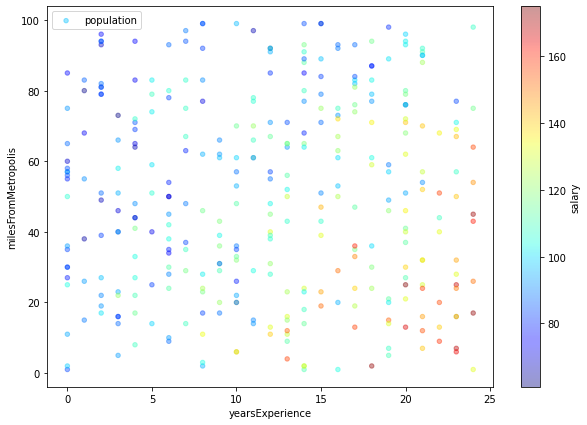

In [92]:
sd3 = job_offers.loc[(job_offers['jobType']=='SENIOR') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='PHYSICS') & (job_offers['industry']=='AUTO'),:]
sd3.plot(kind="scatter", x="yearsExperience", y="milesFromMetropolis", alpha=0.4,
     label="population", figsize=(10,7),
    c="salary", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()
#save_fig("housing_prices_scatterplot")

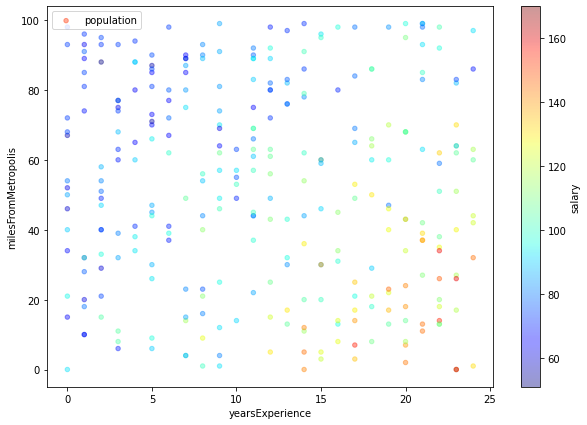

In [93]:
sd4 = job_offers.loc[(job_offers['jobType']=='JUNIOR') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='PHYSICS') & (job_offers['industry']=='AUTO'),:]
sd4.plot(kind="scatter", x="yearsExperience", y="milesFromMetropolis", alpha=0.4,
     label="population", figsize=(10,7),
    c="salary", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()
#save_fig("housing_prices_scatterplot")

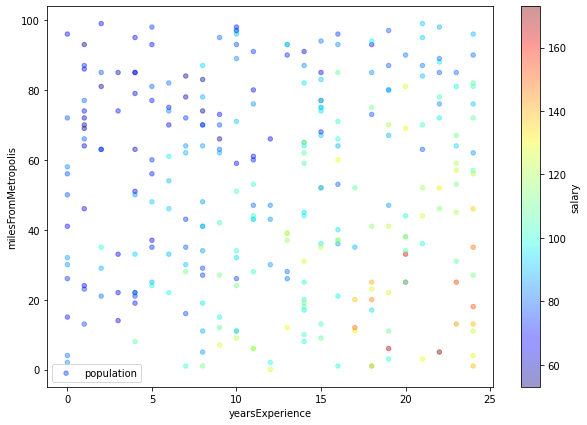

In [94]:
sd5 = job_offers.loc[(job_offers['jobType']=='JUNIOR') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='BIOLOGY') & (job_offers['industry']=='AUTO'),:]
sd5.plot(kind="scatter", x="yearsExperience", y="milesFromMetropolis", alpha=0.4,
     label="population", figsize=(10,7),
    c="salary", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()
#save_fig("housing_prices_scatterplot")

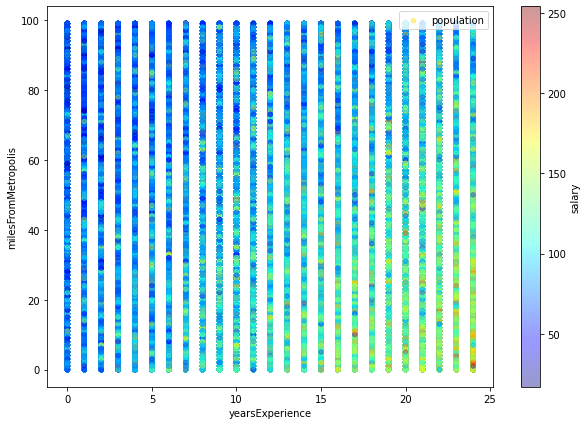

In [30]:
sd6 = job_offers.loc[(job_offers['degree']=='NONE') & (job_offers['major']=='NONE'), :]
sd6.plot(kind="scatter", x="yearsExperience", y="milesFromMetropolis", alpha=0.4,
     label="population", figsize=(10,7),
    c="salary", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()
#save_fig("housing_prices_scatterplot")

In [20]:
corr_matrix = job_offers.corr()

In [21]:
corr_matrix

,index,yearsExperience,milesFromMetropolis,salary
index,1.000000,0.001071,0.002116,-0.001234
yearsExperience,0.001071,1.000000,-0.000671,0.374509
milesFromMetropolis,0.002116,-0.000671,1.000000,-0.297465
salary,-0.001234,0.374509,-0.297465,1.000000


In [22]:
corr_matrix['salary']

index                 -0.001234
yearsExperience        0.374509
milesFromMetropolis   -0.297465
salary                 1.000000
Name: salary, dtype: float64

### ---- 5 Establish a baseline ----

In [ ]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

We use MSE to evaluate the baseline

Let's create a simple model which for a given job offer, use the average salary of the feature **jobType** as prediction. We make this choice because **jobType** feature shows more variability for the target feature.

In [200]:
grouped_by_jobType = job_offers.groupby('jobType').agg({'salary':'mean'})

In [201]:
grouped_by_jobType

,salary
jobType,
CEO,145.325812
CFO,135.535918
CTO,135.492422
JANITOR,70.816789
JUNIOR,95.385604
MANAGER,115.384786
SENIOR,105.502645
VICE_PRESIDENT,125.342681


In [202]:
grouped_by_jobType['jobT'] = grouped_by_jobType.index
grouped_by_jobType

,salary,jobT
jobType,,
CEO,145.325812,CEO
CFO,135.535918,CFO
CTO,135.492422,CTO
JANITOR,70.816789,JANITOR
JUNIOR,95.385604,JUNIOR
MANAGER,115.384786,MANAGER
SENIOR,105.502645,SENIOR
VICE_PRESIDENT,125.342681,VICE_PRESIDENT


Baseline prediction on train dataset

In [106]:
baseline_prediction_train = pd.DataFrame(pd.merge(features_test['jobType'], grouped_by_jobType, left_on='jobType', right_on='jobT', how='left'))

In [107]:
baseline_prediction_train = baseline_prediction_train['salary']
baseline_prediction_train

0         135.535918
1         135.492422
2          70.816789
3         145.325812
4         135.492422
             ...    
199994    125.342681
199995    105.502645
199996     95.385604
199997    135.492422
199998    145.325812
Name: salary, Length: 199999, dtype: float64

Baseline model evaluation

In [108]:
baseline_score = sk.metrics.mean_squared_error(salaries_test['salary'], baseline_prediction_train)
baseline_score

962.4720172032261

### Run the baseline model on test dataset

In [16]:
baseline_prediction_test = pd.DataFrame(pd.merge(test_features['jobType'], grouped_by_jobType, left_on='jobType', right_on='jobT', how='left'))

In [17]:
baseline_prediction_test = baseline_prediction_test['salary']
baseline_prediction_test

0         115.368518
1          95.333087
2         135.481067
3         115.368518
4          95.333087
             ...    
999995    125.368630
999996    115.368518
999997     70.813045
999998    135.481067
999999     95.333087
Name: salary, Length: 1000000, dtype: float64

### ---- 6 Hypothesize solution ----

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

* Ridge Regression
* Random Forest
* KNN

New features

`major_mean`: mean salary for each level of `major` feature  
`degree_mean`: mean salary for each level of `degree` feature  
`jobType_mean`: mean salary for each level of `jobType` feature  
`industry_mean`: mean salary for each level of `industry` feature  
`companyId_mean`: mean salary for each level of `company` feature

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [23]:
#This function takes a feature as input and
#returns a serie containing the mean for each level of the input feature
def mean_serie(feature, X, complete_train_data, agg):
    grouped_by_feature = complete_train_data.groupby(feature).agg({agg:'mean'})
    grouped_by_feature['f_col'] = grouped_by_feature.index
    return pd.merge(X[feature], grouped_by_feature, left_on=feature, right_on='f_col', how='left')[agg]

In [24]:
def transform(X, complete_train_data):
    X_mean = pd.DataFrame()
    X_mean['major_mean'] = mean_serie('major', X, complete_train_data, 'salary')
    X_mean['degree_mean'] = mean_serie('degree', X, complete_train_data, 'salary')
    X_mean['jobType_mean'] = mean_serie('jobType', X, complete_train_data, 'salary')
    X_mean['industry_mean'] = mean_serie('industry', X, complete_train_data, 'salary')
    X_mean['companyId_mean'] = mean_serie('companyId', X, complete_train_data, 'salary')
    return X_mean

In [25]:
m = mean_serie('jobType', features_train, job_offers, 'salary')
m.head(100)

0     135.492422
1     125.342681
2     125.342681
3     135.492422
4     125.342681
         ...    
95    135.535918
96    135.492422
97     70.816789
98    125.342681
99    115.384786
Name: salary, Length: 100, dtype: float64

In [26]:
features_train_mean = transform(features_train, job_offers)
#X_transformed = pd.DataFrame(pd.concat([features_train,features_train_mean], axis=1, ignore_index=True))
features_train_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799996 entries, 0 to 799995
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   major_mean      799996 non-null  float64
 1   degree_mean     799996 non-null  float64
 2   jobType_mean    799996 non-null  float64
 3   industry_mean   799996 non-null  float64
 4   companyId_mean  799996 non-null  float64
dtypes: float64(5)
memory usage: 36.6 MB


In [27]:
features_train_mean = pd.concat([features_train.reset_index(drop=True), features_train_mean], axis=1)
features_train_mean.head(20)

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,major_mean,degree_mean,jobType_mean,industry_mean,companyId_mean
0,731323,JOB1362685139010,COMP26,CTO,HIGH_SCHOOL,NONE,EDUCATION,7,80,102.581630,101.877775,135.492422,99.367446,115.933741
1,614665,JOB1362685022352,COMP7,VICE_PRESIDENT,NONE,NONE,FINANCE,21,41,102.581630,98.180620,125.342681,130.779639,115.666903
2,695417,JOB1362685103104,COMP52,VICE_PRESIDENT,NONE,NONE,HEALTH,17,85,102.581630,98.180620,125.342681,115.767039,116.113617
3,888571,JOB1362685296258,COMP61,CTO,MASTERS,ENGINEERING,OIL,2,41,138.400862,130.491255,135.492422,130.953240,116.118263
4,133504,JOB1362684541191,COMP53,VICE_PRESIDENT,DOCTORAL,BIOLOGY,WEB,18,59,128.038962,135.476436,125.342681,121.679199,115.141155
5,566817,JOB1362684974504,COMP14,VICE_PRESIDENT,BACHELORS,MATH,AUTO,15,65,133.318760,125.464449,125.342681,109.418879,116.066603
6,821379,JOB1362685229066,COMP51,CTO,DOCTORAL,LITERATURE,HEALTH,18,37,124.374452,135.476436,135.492422,115.767039,116.235087
7,654918,JOB1362685062605,COMP60,CEO,NONE,NONE,AUTO,15,59,102.581630,98.180620,145.325812,109.418879,116.346139
8,166486,JOB1362684574173,COMP46,JUNIOR,DOCTORAL,NONE,WEB,10,95,102.581630,135.476436,95.385604,121.679199,115.849521
9,278333,JOB1362684686020,COMP23,CTO,BACHELORS,COMPSCI,FINANCE,23,39,131.998157,125.464449,135.492422,130.779639,116.276509


In [28]:
features_train_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799996 entries, 0 to 799995
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                799996 non-null  int64  
 1   jobId                799996 non-null  object 
 2   companyId            799996 non-null  object 
 3   jobType              799996 non-null  object 
 4   degree               799996 non-null  object 
 5   major                799996 non-null  object 
 6   industry             799996 non-null  object 
 7   yearsExperience      799996 non-null  int64  
 8   milesFromMetropolis  799996 non-null  int64  
 9   major_mean           799996 non-null  float64
 10  degree_mean          799996 non-null  float64
 11  jobType_mean         799996 non-null  float64
 12  industry_mean        799996 non-null  float64
 13  companyId_mean       799996 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 85.4+ MB


In [29]:
salaries_train.head(10)

,index,jobId,salary
731320,731323,JOB1362685139010,66
614663,614665,JOB1362685022352,151
695414,695417,JOB1362685103104,84
888566,888571,JOB1362685296258,151
133503,133504,JOB1362684541191,153
566815,566817,JOB1362684974504,98
821375,821379,JOB1362685229066,148
654915,654918,JOB1362685062605,145
166485,166486,JOB1362684574173,81
278332,278333,JOB1362684686020,157


In [30]:
features_test_transformed = transform(features_test, job_offers)

In [31]:
features_test_transformed = pd.concat([features_test.reset_index(drop=True), features_test_transformed], axis=1)
features_test_transformed.head(20)

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,major_mean,degree_mean,jobType_mean,industry_mean,companyId_mean
0,5462,JOB1362684413149,COMP4,CFO,MASTERS,BUSINESS,HEALTH,24,84,135.687810,130.491255,135.535918,115.767039,116.470276
1,799104,JOB1362685206791,COMP22,CTO,HIGH_SCHOOL,NONE,EDUCATION,16,35,102.581630,101.877775,135.492422,99.367446,116.264505
2,655332,JOB1362685063019,COMP6,JANITOR,HIGH_SCHOOL,NONE,WEB,15,77,102.581630,101.877775,70.816789,121.679199,116.124378
3,546846,JOB1362684954533,COMP30,CEO,HIGH_SCHOOL,NONE,OIL,16,90,102.581630,101.877775,145.325812,130.953240,115.547701
4,678294,JOB1362685085981,COMP45,CTO,DOCTORAL,CHEMISTRY,OIL,3,12,129.132053,135.476436,135.492422,130.953240,115.462420
5,210059,JOB1362684617746,COMP4,CFO,DOCTORAL,LITERATURE,EDUCATION,0,4,124.374452,135.476436,135.535918,99.367446,116.470276
6,671472,JOB1362685079159,COMP3,CTO,MASTERS,ENGINEERING,AUTO,0,17,138.400862,130.491255,135.492422,109.418879,116.254446
7,83511,JOB1362684491198,COMP38,CFO,NONE,NONE,WEB,8,23,102.581630,98.180620,135.535918,121.679199,116.383490
8,122887,JOB1362684530574,COMP35,JANITOR,HIGH_SCHOOL,NONE,HEALTH,19,78,102.581630,101.877775,70.816789,115.767039,115.900666
9,662079,JOB1362685069766,COMP17,JUNIOR,BACHELORS,ENGINEERING,FINANCE,12,71,138.400862,125.464449,95.385604,130.779639,116.154915


In [32]:
features_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                199999 non-null  int64  
 1   jobId                199999 non-null  object 
 2   companyId            199999 non-null  object 
 3   jobType              199999 non-null  object 
 4   degree               199999 non-null  object 
 5   major                199999 non-null  object 
 6   industry             199999 non-null  object 
 7   yearsExperience      199999 non-null  int64  
 8   milesFromMetropolis  199999 non-null  int64  
 9   major_mean           199999 non-null  float64
 10  degree_mean          199999 non-null  float64
 11  jobType_mean         199999 non-null  float64
 12  industry_mean        199999 non-null  float64
 13  companyId_mean       199999 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 21.4+ MB


In [249]:
c = features_train_transformed.corr()
c

,major_mean,degree_mean,jobType_mean,industry_mean,companyId_mean
major_mean,1.000000,0.852768,0.256997,0.001190,0.005835
degree_mean,0.852768,1.000000,0.288524,0.001185,0.006162
jobType_mean,0.256997,0.288524,1.000000,0.002329,0.006866
industry_mean,0.001190,0.001185,0.002329,1.000000,0.001660
companyId_mean,0.005835,0.006162,0.006866,0.001660,1.000000


In [250]:
df = pd.concat([features_train_transformed, salaries_train.reset_index(drop=True)['salary']], axis=1)
c = df.corr()

In [251]:
c

,major_mean,degree_mean,jobType_mean,industry_mean,companyId_mean,salary
major_mean,1.000000,0.852768,0.256997,0.001190,0.005835,0.378608
degree_mean,0.852768,1.000000,0.288524,0.001185,0.006162,0.401348
jobType_mean,0.256997,0.288524,1.000000,0.002329,0.006866,0.597398
industry_mean,0.001190,0.001185,0.002329,1.000000,0.001660,0.297152
companyId_mean,0.005835,0.006162,0.006866,0.001660,1.000000,0.010377
salary,0.378608,0.401348,0.597398,0.297152,0.010377,1.000000


In [49]:
abs(c['salary'].sort_values(ascending=True)) 

milesFromMetropolis    0.297686
index                  0.000790
companyId_mean         0.008498
industry_mean          0.296626
yearsExperience        0.375013
major_mean             0.378675
degree_mean            0.401300
jobType_mean           0.597463
salary                 1.000000
Name: salary, dtype: float64

### ---- 8 Create models ----

In [52]:
#create and tune the models that you brainstormed during part 2
ridge = Ridge()
svm = SVR(verbose=True)
rdf = RandomForestRegressor()

### ---- 9 Test models ----

In [33]:
#do 5-fold cross validation on models and measure MSE
def cross_val(regressor, features):
#models list stored following this pattern: (model, score)
    models_with_score = []
#selected regressors
    for k, (train_index, test_index) in enumerate(kFold.split(train_features, train_salaries)):
        model = regressor  
        print(train_index)
        model.fit(train_features[features].iloc[train_index], train_salaries.iloc[train_index]['salary'])
        y_pred = model.predict(train_features[features].iloc[test_index])
        score = sk.metrics.mean_squared_error(train_salaries.iloc[test_index]['salary'], y_pred)
        models_with_score.append((model, score))
        print('Fold: %s, Acc: %.3f' %(k+1, models_with_score[k][1]))

In [34]:
def cv_optimize(reg, parameters, X, y, n_jobs=1, n_folds=5, score_func=None, refit=True):
    if score_func:
        gs = GridSearchCV(reg, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func, refit=refit)
    else:
        gs = GridSearchCV(reg, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, refit=refit)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_, gs.best_index_)
    best = gs.best_estimator_
    return best

In [35]:
features_1 = ['companyId', 'major', 'degree', 'jobType', 'industry', 'yearsExperience', 'milesFromMetropolis']
features_2 = ['companyId_mean','major_mean', 'degree_mean', 'jobType_mean', 'industry_mean', 'yearsExperience']
features_3 = ['degree_mean', 'jobType_mean', 'industry_mean', 'yearsExperience', 'milesFromMetropolis']
features_4 = ['degree_mean', 'jobType_mean', 'yearsExperience', 'milesFromMetropolis']
features_5 = ['yearsExperience', 'milesFromMetropolis']

In [36]:
scaler = sk.preprocessing.StandardScaler().fit(features_train_mean[features_3])

In [37]:
features_train_mean = scaler.transform(features_train_mean[features_3])

In [42]:
features_train_mean = pd.DataFrame(features_train_mean, columns=features_3)

In [43]:
lr_parameters =  {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e2, 1e3, 1e4, 5e4, 1e5, 6e5, 1e6]}
ridge = cv_optimize(ridge, lr_parameters, features_train_mean[features_3], salaries_train['salary'], score_func="neg_mean_squared_error")

BEST {'alpha': 1.0} -404.6845166861948 9


In [46]:
features_test_transformed = scaler.transform(features_test_transformed[features_3])

In [48]:
features_test_transformed = pd.DataFrame(features_test_transformed, columns=features_3)

In [49]:
ridge_salary_pred = ridge.predict(features_test_transformed[features_3])
ridge_salary_pred[:100]

array([152.20866928, 121.53419136,  68.12966884, 139.5700369 ,
       156.93759035, 122.78345181, 124.4248135 , 130.14634202,
        69.89227254, 109.82310226, 136.00974299,  72.7837378 ,
        58.80957802, 128.61691361,  89.69944375, 123.21019749,
        77.79338166,  86.95843682, 153.94866687, 120.17531278,
       101.30522498, 126.41133691, 111.41358201, 114.44627679,
       127.05408173, 129.45101307,  83.02829663, 134.4497881 ,
       167.7945735 , 110.56622216,  92.11466711, 138.95691472,
       137.75310546,  74.13224504,  93.57072218,  85.76192514,
        73.47925597, 121.62224308, 145.18457243,  74.10269277,
       107.69860214, 106.93974871, 143.46533682, 162.9088768 ,
       156.69197291, 192.13322378, 142.38849225,  90.93593136,
       138.54926764,  86.66379664, 104.37422984, 109.16328236,
       136.33916191,  34.30881685, 113.01736066,  64.84363235,
       156.5845888 , 102.17676624, 188.45937906, 103.12621512,
        80.13975474, 151.95369923, 135.59077719,  97.92

In [50]:
ridge_score = sk.metrics.mean_squared_error( salaries_test['salary'], ridge_salary_pred)
ridge_score

403.16741342068383

In [ ]:
svr_parameters =  {"C": [1e-3, 1e-2, 1e-1, 1.0, 1e2, 1e3, 1e4], "epsilon": [1e-4, 1e-3, 1e-2, 1e2, 1e3, 1e4, 1e5, 1e6]}
svm = cv_optimize(svm, svr_parameters, features_train_mean[features_3], salaries_train['salary'], score_func="neg_mean_squared_error")

[LibSVM]

In [37]:
cross_val(linearRegression, features_2)

[     1      2      4 ... 999991 999992 999993]
Fold: 1, Acc: 532.494
[     0      1      2 ... 999992 999993 999994]
Fold: 2, Acc: 532.703
[     0      3      5 ... 999992 999993 999994]
Fold: 3, Acc: 531.345
[     0      1      2 ... 999991 999992 999994]
Fold: 4, Acc: 530.364
[     0      1      2 ... 999991 999993 999994]
Fold: 5, Acc: 534.792


In [38]:
cross_val(rdf, features_2)

[     1      2      4 ... 999991 999992 999993]
Fold: 1, Acc: 533.058
[     0      1      2 ... 999992 999993 999994]
Fold: 2, Acc: 532.788
[     0      3      5 ... 999992 999993 999994]
Fold: 3, Acc: 531.509
[     0      1      2 ... 999991 999992 999994]
Fold: 4, Acc: 529.840
[     0      1      2 ... 999991 999993 999994]
Fold: 5, Acc: 534.810


In [97]:
cross_val(knn, features_2)

[     1      2      4 ... 999991 999992 999993]
Fold: 1, Acc: 555.865
[     0      1      2 ... 999992 999993 999994]
Fold: 2, Acc: 554.792
[     0      3      5 ... 999992 999993 999994]
Fold: 3, Acc: 553.485
[     0      1      2 ... 999991 999992 999994]
Fold: 4, Acc: 552.110
[     0      1      2 ... 999991 999993 999994]
Fold: 5, Acc: 556.839


K-Fold with all features

In [ ]:
cross_val(rdf, features_3)

[     1      2      4 ... 999991 999992 999993]


In [50]:
cross_val(linearRegression, features_3)

[     1      2      4 ... 999991 999992 999993]
Fold: 1, Acc: 399.807
[     0      1      2 ... 999992 999993 999994]
Fold: 2, Acc: 398.762
[     0      3      5 ... 999992 999993 999994]
Fold: 3, Acc: 398.587
[     0      1      2 ... 999991 999992 999994]
Fold: 4, Acc: 398.330
[     0      1      2 ... 999991 999993 999994]
Fold: 5, Acc: 400.152


Feature scaling

In [17]:
scaler = sk.preprocessing.StandardScaler().fit(train_features[features_3])

In [18]:
train_features_scaled = scaler.transform(train_features[features_3])

In [19]:
train_features_scaled.mean(axis=0)

array([-2.65740049e-15,  1.12722840e-15, -2.38430202e-15,  1.45035287e-15,
        4.75941668e-17,  1.76215480e-18])

In [20]:
train_features_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [24]:
train_features_scaled = pd.DataFrame(train_features_scaled, columns=features_3)

In [25]:
train_features_scaled.head()

,major_mean,degree_mean,jobType_mean,industry_mean,yearsExperience,milesFromMetropolis
0,1.177232,0.929593,0.838497,-0.028461,-0.276248,1.159047
1,-0.919333,-0.910159,1.264437,0.486129,-1.246801,0.812759
2,0.976048,1.250457,0.402309,-0.028461,-0.276248,-0.399248
3,0.887355,1.250457,-0.029996,-0.577053,-0.553549,-1.126453
4,0.976048,0.604502,0.402309,1.278700,-0.553549,-1.161082


K-Fold with scaled features

In [26]:
#do 5-fold cross validation on models and measure MSE
def cross_val(regressor, X_train, y_train, features):
#models list stored following this pattern: (model, score)
    models_with_score = []
#selected regressors
    for k, (train_index, test_index) in enumerate(kFold.split(X_train, y_train)):
        model = regressor  
        print(train_index)
        model.fit(X_train[features].iloc[train_index], y_train.iloc[train_index]['salary'])
        y_pred = model.predict(X_train[features].iloc[test_index])
        score = sk.metrics.mean_squared_error(y_train.iloc[test_index]['salary'], y_pred)
        models_with_score.append((model, score))
        print('Fold: %s, Acc: %.3f' %(k+1, models_with_score[k][1]))

In [27]:
cross_val(rdf, train_features_scaled, train_salaries, features_3)

[     1      2      4 ... 999991 999992 999993]
Fold: 1, Acc: 440.729
[     0      1      2 ... 999992 999993 999994]
Fold: 2, Acc: 441.833
[     0      3      5 ... 999992 999993 999994]
Fold: 3, Acc: 440.941
[     0      1      2 ... 999991 999992 999994]
Fold: 4, Acc: 440.495
[     0      1      2 ... 999991 999993 999994]
Fold: 5, Acc: 443.280


In [28]:
cross_val(linearRegression, train_features_scaled, train_salaries, features_3)

[     1      2      4 ... 999991 999992 999993]
Fold: 1, Acc: 399.807
[     0      1      2 ... 999992 999993 999994]
Fold: 2, Acc: 398.762
[     0      3      5 ... 999992 999993 999994]
Fold: 3, Acc: 398.587
[     0      1      2 ... 999991 999992 999994]
Fold: 4, Acc: 398.330
[     0      1      2 ... 999991 999993 999994]
Fold: 5, Acc: 400.152


### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data